# Phan tich dataset CDC Diabetes BRFSS 2015

Notebook nay tao cac bieu do theo idea_chart.md.
Mo ta duoc viet bang tieng Viet khong dau de phu hop moi truong ASCII.

Cac bieu do chinh:
- Ty le cac lop Diabetes_012 (mat can bang du lieu)
- So do stacking ensemble (flowchart)
- Scatter truoc/sau SMOTE
- Calibration plot
- So sanh recall giua cac mo hinh
- SHAP summary plot


In [2]:
import pandas as pd
from pathlib import Path

DATA_PATH = Path("diabetes_012_health_indicators_BRFSS2015.csv")
if not DATA_PATH.exists():
    DATA_PATH = Path("..") / ".." / "diabetes_012_health_indicators_BRFSS2015.csv"
DATA_PATH = DATA_PATH.resolve()

FEATURES = [
    'HighBP',
    'HighChol',
    'CholCheck',
    'BMI',
    'Smoker',
    'Stroke',
    'HeartDiseaseorAttack',
    'PhysActivity',
    'Fruits',
    'Veggies',
    'HvyAlcoholConsump',
    'AnyHealthcare',
    'NoDocbcCost',
    'GenHlth',
    'MentHlth',
    'PhysHlth',
    'DiffWalk',
    'Sex',
    'Age',
    'Education',
    'Income',
]
TARGET = 'Diabetes_012'

df = pd.read_csv(DATA_PATH, usecols=[TARGET] + FEATURES).dropna()
df.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## 1) Ty le cac lop (mat can bang du lieu)
Bieu do bar/pie cho thay so luong cac lop 0-1-2.
Muc tieu: nhin ro lop tieu so (nguoi mac benh) nho hon so voi lop khac.


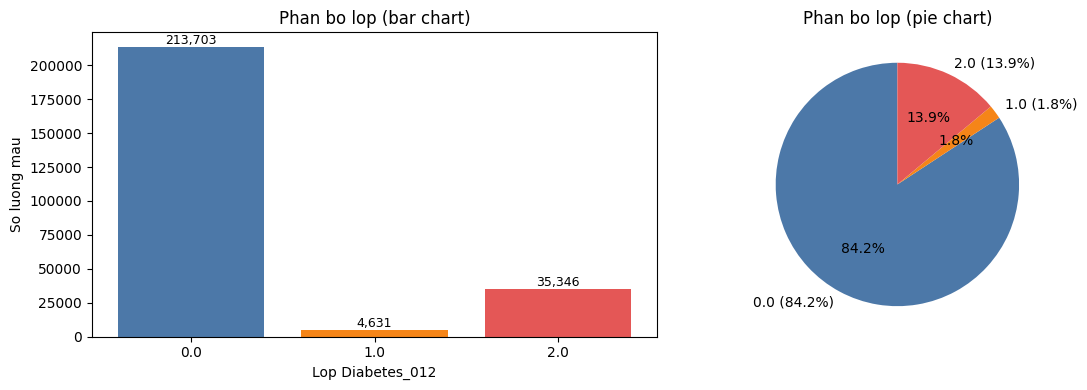

In [8]:
import matplotlib.pyplot as plt
class_counts = df[TARGET].value_counts().sort_index()
class_percent = class_counts / class_counts.sum() * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].bar(class_counts.index.astype(str), class_counts.values, color=['#4C78A8', '#F58518', '#E45756'])
axes[0].set_title('Phan bo lop (bar chart)')
axes[0].set_xlabel('Lop Diabetes_012')
axes[0].set_ylabel('So luong mau')
for idx, value in enumerate(class_counts.values):
    axes[0].text(idx, value, f'{value:,}', ha='center', va='bottom', fontsize=9)

axes[1].pie(
    class_percent.values,
    labels=[f'{cls} ({pct:.1f}%)' for cls, pct in zip(class_counts.index, class_percent.values)],
    autopct='%1.1f%%',
    colors=['#4C78A8', '#F58518', '#E45756'],
    startangle=90,
)
axes[1].set_title('Phan bo lop (pie chart)')

plt.tight_layout()
plt.show()


## 2) So do Stacking Ensemble
Mo hinh minh hoa dong du lieu di qua cac base learners va meta learner.


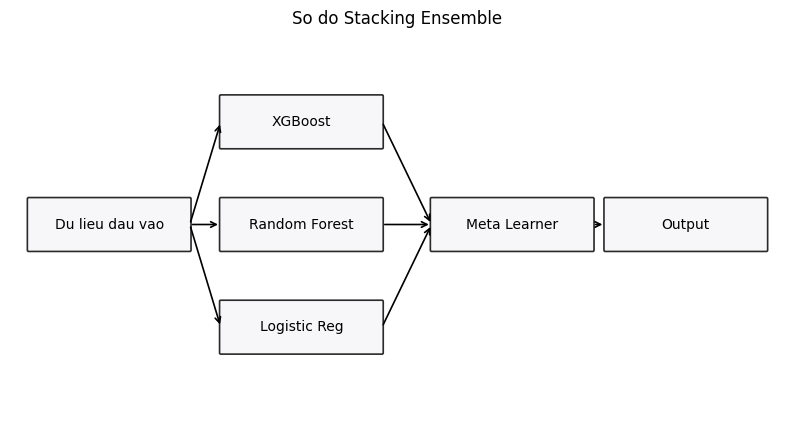

In [9]:
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, 12.5)
ax.set_ylim(0, 6)
ax.axis('off')

def box(x, y, text):
    rect = patches.FancyBboxPatch(
        (x, y), 2.6, 0.8, boxstyle='round,pad=0.02', linewidth=1.2, edgecolor='#2A2A2A', facecolor='#F7F7F9'
    )
    ax.add_patch(rect)
    ax.text(x + 1.3, y + 0.4, text, ha='center', va='center', fontsize=10)

box(0.3, 2.6, 'Du lieu dau vao')
box(3.4, 4.2, 'XGBoost')
box(3.4, 2.6, 'Random Forest')
box(3.4, 1.0, 'Logistic Reg')
box(6.8, 2.6, 'Meta Learner')
box(9.6, 2.6, 'Output')

def arrow(x1, y1, x2, y2):
    ax.annotate('', xy=(x2, y2), xytext=(x1, y1), arrowprops=dict(arrowstyle='->', lw=1.2))

arrow(2.9, 3.0, 3.4, 4.6)
arrow(2.9, 3.0, 3.4, 3.0)
arrow(2.9, 3.0, 3.4, 1.4)

arrow(6.0, 4.6, 6.8, 3.0)
arrow(6.0, 3.0, 6.8, 3.0)
arrow(6.0, 1.4, 6.8, 3.0)

arrow(9.4, 3.0, 9.6, 3.0)

ax.set_title('So do Stacking Ensemble', fontsize=12)
plt.show()


## 3) SMOTE - so sanh truoc va sau
Dung PCA 2 chieu de minh hoa phan bo mau truoc va sau khi SMOTE.


C:\Users\lyduc\AppData\Local\Temp\ipykernel_14308\2955566645.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = df.groupby(TARGET, group_keys=False).apply(


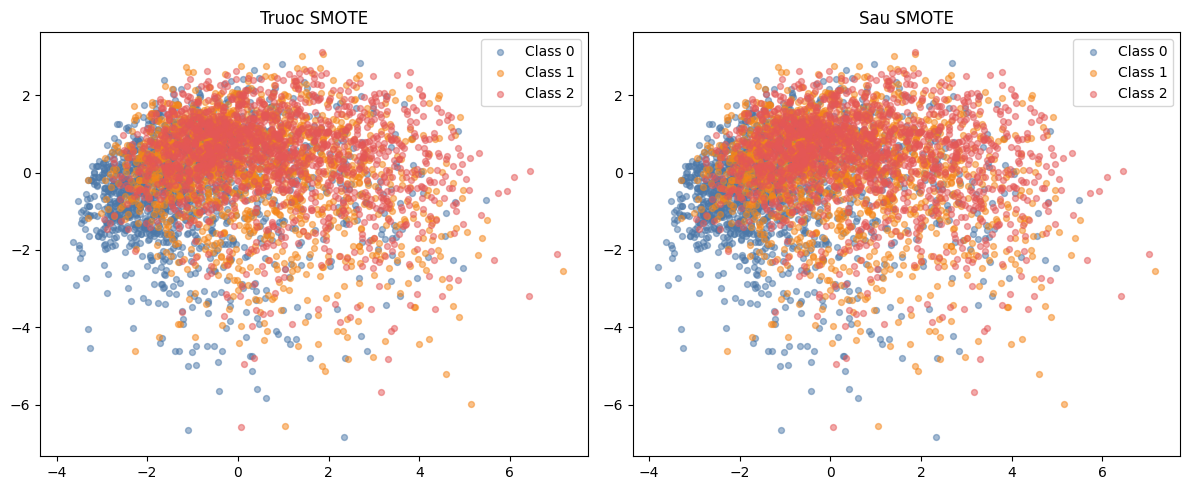

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_sample = df.groupby(TARGET, group_keys=False).apply(
    lambda x: x.sample(min(len(x), 1500), random_state=42)
)

X = df_sample[FEATURES].values
y = df_sample[TARGET].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)
X_res_pca = pca.transform(X_res)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for cls, color in zip([0, 1, 2], ['#4C78A8', '#F58518', '#E45756']):
    mask = y == cls
    axes[0].scatter(X_pca[mask, 0], X_pca[mask, 1], s=18, alpha=0.5, label=f'Class {cls}', color=color)
axes[0].set_title('Truoc SMOTE')
axes[0].legend()

for cls, color in zip([0, 1, 2], ['#4C78A8', '#F58518', '#E45756']):
    mask = y_res == cls
    axes[1].scatter(X_res_pca[mask, 0], X_res_pca[mask, 1], s=18, alpha=0.5, label=f'Class {cls}', color=color)
axes[1].set_title('Sau SMOTE')
axes[1].legend()

plt.tight_layout()
plt.show()


## 4) Calibration plot
So sanh duong cong tin cay truoc va sau khi calibration (sigmoid).


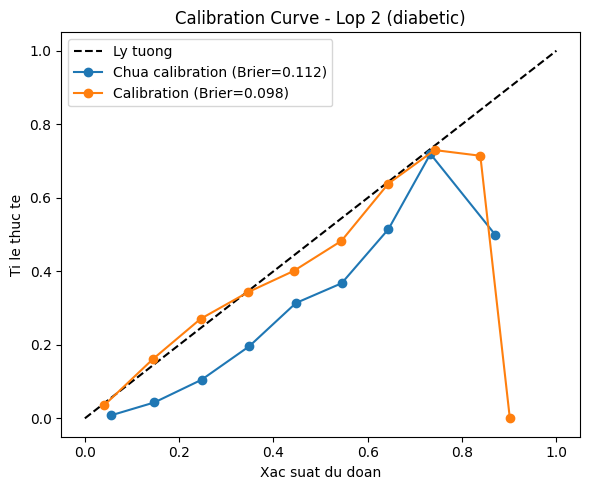

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.metrics import brier_score_loss
from sklearn.preprocessing import StandardScaler

df_cal = df.sample(n=min(50000, len(df)), random_state=42)
X_cal = df_cal[FEATURES].values
y_cal = df_cal[TARGET].values

X_train, X_test, y_train, y_test = train_test_split(
    X_cal, y_cal, test_size=0.2, random_state=42, stratify=y_cal
)

base_model = Pipeline(
    steps=[('scaler', StandardScaler()), ('clf', LogisticRegression(max_iter=500, class_weight='balanced'))]
)
base_model.fit(X_train, y_train)

calibrated_model = CalibratedClassifierCV(base_model, cv=3, method='sigmoid')
calibrated_model.fit(X_train, y_train)

class_index = list(base_model.named_steps['clf'].classes_).index(2)
proba_base = base_model.predict_proba(X_test)[:, class_index]
proba_cal = calibrated_model.predict_proba(X_test)[:, class_index]

y_true_bin = (y_test == 2).astype(int)
prob_true_base, prob_pred_base = calibration_curve(y_true_bin, proba_base, n_bins=10)
prob_true_cal, prob_pred_cal = calibration_curve(y_true_bin, proba_cal, n_bins=10)

brier_base = brier_score_loss(y_true_bin, proba_base)
brier_cal = brier_score_loss(y_true_bin, proba_cal)

plt.figure(figsize=(6, 5))
plt.plot([0, 1], [0, 1], 'k--', label='Ly tuong')
plt.plot(prob_pred_base, prob_true_base, marker='o', label=f'Chua calibration (Brier={brier_base:.3f})')
plt.plot(prob_pred_cal, prob_true_cal, marker='o', label=f'Calibration (Brier={brier_cal:.3f})')
plt.title('Calibration Curve - Lop 2 (diabetic)')
plt.xlabel('Xac suat du doan')
plt.ylabel('Ti le thuc te')
plt.legend()
plt.tight_layout()
plt.show()


## 5) So sanh Recall (lop 2) giua cac mo hinh
Neu khong co XGBoost hoac StackingClassifier, code se tu dong dung phien ban thay the de minh hoa.


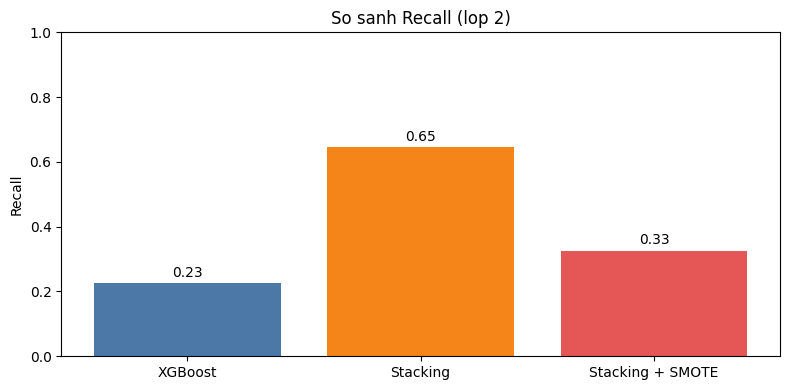

In [13]:
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.base import clone
from imblearn.pipeline import Pipeline as ImbPipeline

try:
    from xgboost import XGBClassifier
    xgb_available = True
except Exception:
    from sklearn.ensemble import HistGradientBoostingClassifier
    xgb_available = False

try:
    from sklearn.ensemble import StackingClassifier
    stacking_available = True
except Exception:
    from sklearn.ensemble import VotingClassifier
    stacking_available = False

df_model = df.sample(n=min(20000, len(df)), random_state=42)
X = df_model[FEATURES].values
y = df_model[TARGET].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

base_estimators = [
    ('logreg', Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(max_iter=300, class_weight='balanced'))])),
    ('rf', RandomForestClassifier(n_estimators=120, random_state=42, n_jobs=-1)),
    ('gb', GradientBoostingClassifier(random_state=42)),
]

if xgb_available:
    xgb_model = XGBClassifier(
        n_estimators=200,
        max_depth=4,
        learning_rate=0.1,
        subsample=0.9,
        colsample_bytree=0.9,
        objective='multi:softprob',
        num_class=3,
        eval_metric='mlogloss',
        random_state=42,
        n_jobs=-1,
    )
    xgb_label = 'XGBoost'
else:
    xgb_model = HistGradientBoostingClassifier(random_state=42)
    xgb_label = 'XGBoost (fallback)'

if stacking_available:
    stacking_model = StackingClassifier(
        estimators=base_estimators,
        final_estimator=LogisticRegression(max_iter=300, class_weight='balanced'),
        stack_method='predict_proba',
    )
else:
    stacking_model = VotingClassifier(estimators=base_estimators, voting='soft')

smote = SMOTE(random_state=42)
stacking_smote = ImbPipeline([('smote', smote), ('model', clone(stacking_model))])

models = {
    xgb_label: xgb_model,
    'Stacking': stacking_model,
    'Stacking + SMOTE': stacking_smote,
}

recall_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    recall_scores[name] = recall_score(y_test, preds, labels=[2], average='macro')

plt.figure(figsize=(8, 4))
plt.bar(recall_scores.keys(), recall_scores.values(), color=['#4C78A8', '#F58518', '#E45756'])
plt.ylim(0, 1)
plt.title('So sanh Recall (lop 2)')
plt.ylabel('Recall')
for idx, (name, value) in enumerate(recall_scores.items()):
    plt.text(idx, value + 0.02, f'{value:.2f}', ha='center')
plt.tight_layout()
plt.show()


## 6) SHAP summary plot
Bieu do SHAP cho lop 2 (diabetic) de xem bien nao anh huong nhieu nhat.


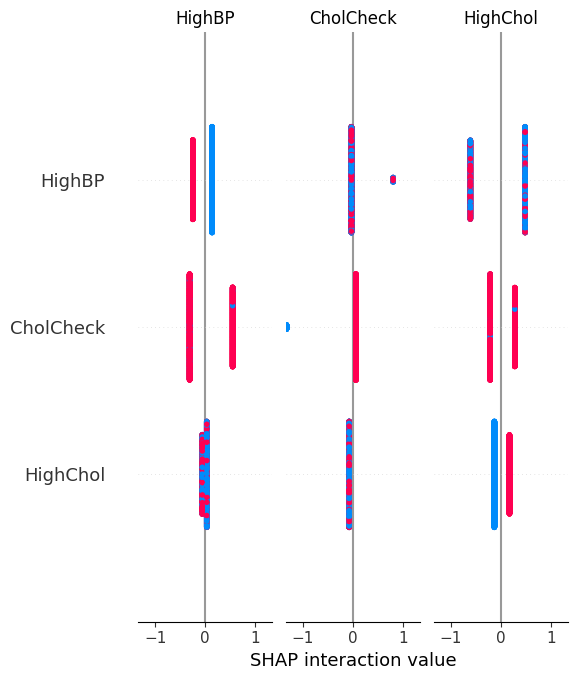

In [10]:
try:
    import shap
    from sklearn.preprocessing import StandardScaler

    df_shap = df.sample(n=min(3000, len(df)), random_state=42)
    X_shap = df_shap[FEATURES]
    y_shap = df_shap[TARGET]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_shap)
    X_scaled_df = pd.DataFrame(X_scaled, columns=FEATURES)

    model = LogisticRegression(max_iter=2000, class_weight='balanced')
    model.fit(X_scaled_df, y_shap)

    explainer = shap.LinearExplainer(model, X_scaled_df)
    shap_values = explainer.shap_values(X_scaled_df)
    class_index = list(model.classes_).index(2)

    values = shap_values[class_index] if isinstance(shap_values, list) else shap_values
    if values.shape[1] == X_scaled_df.shape[1] + 1:
        values = values[:, :-1]

    shap.summary_plot(values, X_scaled_df, show=True)
except ImportError:
    print('SHAP chua duoc cai dat. Hay cai dat trong requirements.txt.')
